In [1]:
import robin_stocks as r
import trading_algorithms as m 
import financial as f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#algorithm for long hold stocks 
#for long hold stocks, only buy when the price is lower that the target price
#and sell when the its diversity over the credential



In [5]:
#calculate 30days ave move and 10 days ave move
#if 10days < 30 days ,trigger buy
tker = 'AAPL'
X = f.requestHistoryStockPriceByDay(tker,60)
Y = []
Z = []
for item in X:
    Y.append(item['close'])
    Z.append(item['date'])
Data = pd.DataFrame(Y[::-1],columns={'price'})
date = pd.DataFrame(Z[::-1],columns={'date'})



          date      MACD    signal  histogram
0   2020-08-21  0.000000  0.000000   0.000000
1   2020-08-24  0.118661  0.023732   0.094928
2   2020-08-25  0.127911  0.044568   0.083343
3   2020-08-26  0.269115  0.089477   0.179637
4   2020-08-27  0.256022  0.122786   0.133236
5   2020-08-28  0.226693  0.143568   0.083125
6   2020-08-31  0.538765  0.222607   0.316158
7   2020-09-01  1.187155  0.415517   0.771639
8   2020-09-02  1.459858  0.624385   0.835473
9   2020-09-03  0.817675  0.663043   0.154632
10  2020-09-04  0.311605  0.592755  -0.281151
11  2020-09-08 -0.737785  0.326647  -1.064433
12  2020-09-09 -1.192575  0.022803  -1.215378
13  2020-09-10 -1.840828 -0.349923  -1.490905
14  2020-09-11 -2.446601 -0.769259  -1.677342
15  2020-09-14 -2.625293 -1.140466  -1.484828
16  2020-09-15 -2.721018 -1.456576  -1.264442
17  2020-09-16 -3.037030 -1.772667  -1.264363
18  2020-09-17 -3.392800 -2.096693  -1.296106
19  2020-09-18 -3.912075 -2.459770  -1.452305
20  2020-09-21 -4.015870 -2.770990

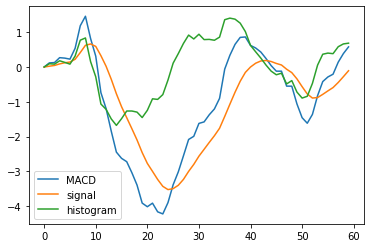

In [6]:
#moving average 
def moving_average(group, n=9):
    return group.rolling(n).mean()

def cal_ema(data,period):
    return data.ewm(span=period, adjust=False).mean()

sma30 = moving_average(Data, 30)
#f = np.array(sma30[30:].values)
#print(np.gradient(f,axis=1))

#MACD
#macd line = 12ema - 26ema
#signal line = 9ema of the macd lines
#histogram = macd line - signal line 
def cal_macd(group, nslow=26, nfast=12, signal=9):
    emaslow = group.ewm(span=nslow, adjust=False).mean()
    emafast = group.ewm(span=nfast, adjust=False).mean()
    macd = emafast - emaslow
    sig = macd.ewm(span=signal, adjust=False).mean()
    histogram = macd - sig
    #result = pd.DataFrame({ 'emaSlw':[emaslow], 'emaFast':[emafast]})
    result = pd.concat((date,(emafast-emaslow),sig, histogram),axis=1, sort=False)
    result.columns = ['date','MACD','signal','histogram']
    return result

MACD = cal_macd(Data)
print(MACD)
print(MACD['histogram'][30:].mean())

#visualize the data
MACD.plot()


[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
         his  state
0   0.000000      1
1   0.094928      1
2   0.083343      0
3   0.179637      1
4   0.133236      0
5   0.083125      0
6   0.316158      1
7   0.771639      1
8   0.835473      1
9   0.154632      0
10 -0.281151      0
11 -1.064433      0
12 -1.215378      0
13 -1.490905      0
14 -1.677342      0
15 -1.484828      1
16 -1.264442      1
17 -1.264363      1
18 -1.296106      0
19 -1.452305      0
20 -1.244880      1
21 -0.913945      1
22 -0.930569      0
23 -0.792541      1
24 -0.374109      1
25  0.110924      1
26  0.385470      1
27  0.678104      1
28  0.917964      1
29  0.806947      0
30  0.942664      1
31  0.788531      0
32  0.794689      1
33  0.769630      0
34  0.859220      1
35  1.360544      1
36  1.405791      1
37  1.375944      0
38  1.261081      0
39  1.018859      0

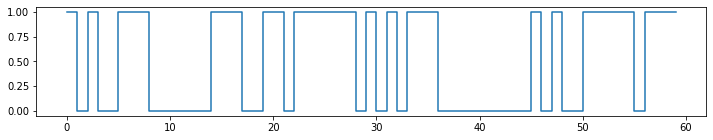

In [7]:
#climbing theory 
#starting from looking for up trend and down trend 
current_value = 0
current_state = 0
state = []
hist = []
for value in MACD['histogram']:
    if value >= current_value:
        current_state = 1
    elif value < current_value:
        current_state = 0
    current_value = value
    state.append(current_state)
    hist.append(value)
plt.figure(figsize=(12, 2))
plt.step(np.arange(len(state)),state)
print(state)
data_hist = pd.DataFrame(list(zip(hist,state)),columns=['his','state'])
print(data_hist)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
          date       his  state
0   2020-08-21  0.000000      1
1   2020-08-24  0.094928      1
2   2020-08-25  0.083343      1
3   2020-08-26  0.179637      1
4   2020-08-27  0.133236      1
5   2020-08-28  0.083125      1
6   2020-08-31  0.316158      1
7   2020-09-01  0.771639      1
8   2020-09-02  0.835473      1
9   2020-09-03  0.154632      0
10  2020-09-04 -0.281151      0
11  2020-09-08 -1.064433      0
12  2020-09-09 -1.215378      0
13  2020-09-10 -1.490905      0
14  2020-09-11 -1.677342      0
15  2020-09-14 -1.484828      1
16  2020-09-15 -1.264442      1
17  2020-09-16 -1.264363      1
18  2020-09-17 -1.296106      1
19  2020-09-18 -1.452305      1
20  2020-09-21 -1.244880      1
21  2020-09-22 -0.913945      1
22  2020-09-23 -0.930569      1
23  2020-09-24 -0.792541      1
24  2020-09-25 -0.3

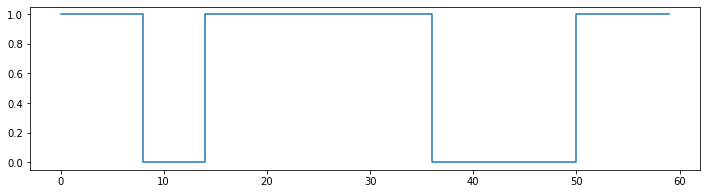

In [8]:
#create window based on the distance    
def create_win(window, distance):
    new_win = []
    for item in window:
        new_win += [item]*distance
    return new_win

def filter_data(data, distance):
    win_zero = [0,1,0]
    win_one = [1,0,1]
    win_zero = create_win(win_zero, distance)
    win_one = create_win(win_one, distance)
    for i in range(len(data)):
        if i <  distance:
            next
        if i == len(data):
            break
        if data[i-distance:i+distance+1*distance] == win_one:
            for n in range(distance):
                data[i+n] = 1
        elif data[i-distance:i+distance+1*distance] == win_zero:
            for n in range(distance):
                data[i+n] = 0
    return data

distance = 2
result = state
for n in range(1,distance+1):
    result = filter_data(result,n)

print(result)
#visualize
plt.figure(figsize=(12, 3))
#plt.step(np.arange(len(result)),result)
plt.step(np.arange(len(state)),state)
data_hist = pd.DataFrame(list(zip(hist,result)),columns=['his','state'])
data_hist = pd.concat((date,data_hist),axis=1,sort=False)
print(data_hist)

In [9]:
#method to catch the last three days trend
#if 0,0,0,1,1 it will be a buy trend 

In [10]:
buy_win = [0,0,1]
sell_win = [0,0,0]
#result = [0,0,1,1,0,0,0,1,1]
for i in range(len(result)):
    if i < 2:
        next
    if result[i-3:i] == buy_win:
        if data_hist['his'][i] < 0:
            print('buy',i, date.iloc[i]['date'])
    """elif result[i-3:i] == sell_win:
        if data_hist['his'][i] > 0 and data_hist['his'][i] < 0.1:
            print('sell',i, date.iloc[i]['date'])"""
            


buy 16 2020-09-15
buy 52 2020-11-04


In [ ]:
v